In [1]:
import os
import re
import pandas as pd

In [2]:
fileList = ('./data/' + _ for _ in os.listdir('./data/') if 'article.csv' in _)
dataset = (pd.read_csv(file) for file in fileList)
dataDF = pd.concat(dataset, ignore_index=True).dropna()

dataDF.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368875 entries, 0 to 371075
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       368875 non-null  int64 
 1   menu     368875 non-null  int64 
 2   cafe     368875 non-null  int64 
 3   title    368875 non-null  object
 4   author   368875 non-null  object
 5   date     368875 non-null  object
 6   content  368875 non-null  object
dtypes: int64(3), object(4)
memory usage: 22.5+ MB


In [33]:
fileList = ('./data/' + _ for _ in os.listdir('./data/') if 'comment.csv' in _)
dataset = (pd.read_csv(file, encoding='ISO-8859-1', on_bad_lines='warn', engine='python') for file in fileList)
commentDF = pd.concat(dataset, ignore_index=True).dropna()

commentDF.info()

Skipping line 39569: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 40359: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 41736: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 42836: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 62743: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170761 entries, 0 to 1205323
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   ï»¿id   1170761 non-null  object 
 1   cafe    1170761 non-null  float64
 2   name    1170761 non-null  object 
 3   date    1170761 non-null  object 
 4   text    1170761 non-null  object 
dtypes: float64(1), object(4)
memory usage: 53.6+ MB


In [3]:
dataDF['date'] = pd.to_datetime(dataDF['date'], format='%Y-%m-%dT%H:%M:%S')

In [4]:
dataDF.sample(5)

,id,menu,cafe,title,author,date,content
166618,11670006,313,16996348,다대일 면접 분위기,olkm03,2022-04-23 20:22:48.793,다대일 면접 분위기 어떤가요?다대다 면접보다 떨릴 것 같아요..ㅎ​🔥 꼭 봐야할 이...
15527,6648215,1211,15754634,고구마 맛잇네요 제철이라,ynpfvpzbdjyxi,2021-03-11 16:02:53.607,"​​​​꿀맛​​​🔥최초배포🔥 자소서, 면접 준비 시간 확 줄여주는 직무별 가이드북..."
275496,4376481,423,16996348,인턴 3개이상했는데 필요없나요>,rjstjd0417,2014-03-04 22:18:04.633,근데 단기로함.. 두달 한달 한달 [[[CONTENT-ELEME...
319759,11771318,811,16996348,1분 자기소개로 하반기 취준 대비하자!,fhj78,2022-07-01 14:32:32.497,하반기 공채 시즌이 시작되고 있습니다이번 분기에도 여러 회사에서 채용이 진행될 예정...
140460,10255618,218,16996348,중견 재무회계팀 스펙 방향 고민입니다. (세무사 1차),ksh0168,2020-06-16 00:40:58.050,[[[CONTENT-ELEMENT-0]]] 제목 작성 방법을 꼭 지켜주세요! ▶ ...


In [13]:
dataDF.groupby(pd.Grouper(key='date', freq='Y')).count()

,id,menu,cafe,title,author,content
date,,,,,,
2012-12-31,228,228,228,228,228,228
2013-12-31,4844,4844,4844,4844,4844,4844
2014-12-31,6588,6588,6588,6588,6588,6588
2015-12-31,6829,6829,6829,6829,6829,6829
2016-12-31,9897,9897,9897,9897,9897,9897
2017-12-31,18098,18098,18098,18098,18098,18098
2018-12-31,29999,29999,29999,29999,29999,29999
2019-12-31,24351,24351,24351,24351,24351,24351
2020-12-31,51330,51330,51330,51330,51330,51330


In [5]:
data = dataDF.copy()

data['year'] = data.date.dt.year

<AxesSubplot:xlabel='year'>

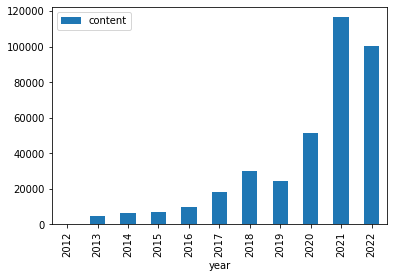

In [16]:
dataCount = data[['year', 'content']].groupby(['year']).count()
dataPlot = dataCount.plot.bar()

dataPlot

In [21]:
dataCount.to_excel('./data/countbyyear.xlsx', encoding='utf-8-sig')

In [17]:
type(dataPlot)

matplotlib.axes._subplots.AxesSubplot

In [5]:
dataDF.loc[250, 'content']

'2학년 1학기 마치고 개인사정으로 휴학하게 되었는데, 1년동안 영어공부만 하기는 좀 그래서 c언어를 공부한 다음에 반도체 관련된 프로그래밍 언어를 공부해볼까 합니다.\u200b첫 번째는 verilog공부를 해서 최종적으로는 FPGA공부도 해볼 생각입니다. 하지만 여기서 걸리는게 FPGA와 verilog는 주로 석사부터 메리트가 있다고 알고있는 회로설계 분야에 많이 쓰이는데, 저는 대학원 생각이 없어서 나중에 도움이 될지 모르겠습니다. 물론 학사로도 회로설계쪽으로 갈 수 있다면 그쪽을 우선적으로 지망할 것 같습니다.\u200b두 번째는 python공부를 하고, 그걸로 tensorflow deep learning 공부를 해볼 생각입니다. 1학년 2학기 프로그래밍 시간에 조금 배우긴 했지만, 약간 암기?식으로 가르쳐주시고 공부도 그렇게 해서 알고 있는 내용은 별로 없습니다. 평소에 해보고싶은 부분이었기도하고, 만약 나중에 반도체가 아닌 다른 진로를 생각하더라도 FPGA보단 범용성이 높을 것 같기 때문입니다. 하지만 여기서 망설여지는건, 삼성전자 직무기술서를 봤을 때 Deep learning이 언급된 분아가 공정설계밖에 없어서 반도체와 크게 관련이 있는지 의문입니다.\u200b답변 주시면 정말정말 감사하겠습니다...\u200b🚨대학생 베스트 인기글🚨 \u200b🤔전공학점 3.98인데 4.0이랑 차이 많은가요? https://vo.la/JRYr3D\u200b\u200b😋휴학 알차게 보내는 방법!! https://vo.la/d6Ki5I\u200b\u200b💦졸업생이 후회하는 전공 1위 └ 취업 잘 되는건 다 옛말이네 ... https://bit.ly/3LSHa8M\u200b\u200b💰필기/면접후기만 남기면 오천원 바로 드림! https://vo.la/ViAGU1\u200b\u200b\u200b※회원님들이 남겨주신 콘텐츠 및 게시글의 저작권은 작성자와 스펙업카페에 있으며, 스펙업에서 제작하는 콘텐츠에  활용될 수 있음을 알려드립니다.'

In [13]:
# pattern = r'[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)'
# pattern = r'\\("|\\|\/|b|f|n|r|t|u(\w|\d){4})'
# pattern = r'[^\s\d\w,.?!]+'
pattern = r'\n'
# pattern = r'\\p{L}'

re.sub(pattern, '', data.loc[250, 'content'])

'2학년 1학기 마치고 개인사정으로 휴학하게 되었는데, 1년동안 영어공부만 하기는 좀 그래서 c언어를 공부한 다음에 반도체 관련된 프로그래밍 언어를 공부해볼까 합니다.첫 번째는 verilog공부를 해서 최종적으로는 FPGA공부도 해볼 생각입니다. 하지만 여기서 걸리는게 FPGA와 verilog는 주로 석사부터 메리트가 있다고 알고있는 회로설계 분야에 많이 쓰이는데, 저는 대학원 생각이 없어서 나중에 도움이 될지 모르겠습니다. 물론 학사로도 회로설계쪽으로 갈 수 있다면 그쪽을 우선적으로 지망할 것 같습니다.두 번째는 python공부를 하고, 그걸로 tensorflow deep learning 공부를 해볼 생각입니다. 1학년 2학기 프로그래밍 시간에 조금 배우긴 했지만, 약간 암기?식으로 가르쳐주시고 공부도 그렇게 해서 알고 있는 내용은 별로 없습니다. 평소에 해보고싶은 부분이었기도하고, 만약 나중에 반도체가 아닌 다른 진로를 생각하더라도 FPGA보단 범용성이 높을 것 같기 때문입니다. 하지만 여기서 망설여지는건, 삼성전자 직무기술서를 봤을 때 Deep learning이 언급된 분아가 공정설계밖에 없어서 반도체와 크게 관련이 있는지 의문입니다.답변 주시면 정말정말 감사하겠습니다...대학생 베스트 인기글 전공학점 3.98인데 4.0이랑 차이 많은가요? 휴학 알차게 보내는 방법!! 졸업생이 후회하는 전공 1위  취업 잘 되는건 다 옛말이네 ... 필기면접후기만 남기면 오천원 바로 드림! 회원님들이 남겨주신 콘텐츠 및 게시글의 저작권은 작성자와 스펙업카페에 있으며, 스펙업에서 제작하는 콘텐츠에  활용될 수 있음을 알려드립니다.'

In [14]:
data['content'] = data[['content']].replace(pattern, '', regex=True)

In [15]:
data.sample(5)

,id,menu,cafe,title,author,date,content
268871,6674250,423,16996348,아시아나 인턴,qhdwn9630,2016-09-30T14:17:59.233000,아시아나 인턴 채용되면 거의 정규직 되나요?CONTENTELEMENT0CONTENT...
131131,7841744,191,16996348,4성급 호텔 사무직 총무 인사 부서 연봉 질문 드립니다!,hwanseok11,2018-01-08T17:50:03.917000,"안녕하세요! 이번에 4성급 호텔에 입사하게 되었는데, 호텔리어 아니고 사무직으로 입..."
269821,6351070,423,16996348,인턴 서류,davin93,2016-04-17T13:09:17.397000,"보통 기업들이나 공기업에서 인턴 뽑을때, 스펙 중요하게 생각하나요..?제가지금 토익..."
161961,11714437,313,16996348,첫 자소서 늦은 새벽까지 써봅니다..,ghksgur1235,2022-05-24T03:24:58.837000,첫 도전이네요... 자소서 쓴지 벌써 3시간째.. 힘드네요ㅠㅠ 꼭 봐야할 이번주 독...
85918,11490651,1233,16996348,반도체쪽 강소or중견 가능할까요?,mijung417,2022-01-14T00:36:01.777000,공대 학점 2.94토익 800 오픽ih 컴활2급반도체공정 실습 단기 대학 랩실 참여...


In [16]:
data.iloc[1000].content

'ㅈㄱㄴ대학생 베스트 인기글 아니 대외활동 합불 결과는 왜 안알려주는건데!? 완전 잡무만 하는중...인턴은 원래 이래?! 알바도 대감집에서 해야 하는 이유  여긴 알바생 등록금까지 내줌 ㄷㄷ 필기면접후기만 남기면 오천원 바로 드림! 무스펙도 합격하는 1기 대외활동 앱에서 매일보기  회원님들이 남겨주신 콘텐츠 및 게시글의 저작권은 작성자와 스펙업카페에 있으며, 스펙업에서 제작하는 콘텐츠에  활용될 수 있음을 알려드립니다.'

In [51]:
AICorp = data.loc[data['content'].str.contains('인공지능', case=False)]
bCorp = data.loc[data['content'].str.contains('벤처', case=False)]

In [45]:
AICorp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 88 to 369980
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       638 non-null    int64 
 1   menu     638 non-null    int64 
 2   cafe     638 non-null    int64 
 3   title    638 non-null    object
 4   author   638 non-null    object
 5   date     638 non-null    object
 6   content  638 non-null    object
dtypes: int64(3), object(4)
memory usage: 39.9+ KB


In [46]:
AICorp.sample(5)

,id,menu,cafe,title,author,date,content
368731,6955840,1211,15754634,통계학과 복전 고민,통롱이,2022-04-29T17:19:00,통계학과 다니고 있습니다. 복수전공으로 컴공이나 인공지능 쪽 생각하고 있는데 사실 ...
345745,10137304,868,16996348,인성검사를 AI면접으로 본다고도 하네요?? ㄷㄷㄷ,osolemio11,2020-04-27T12:24:52.107000,CONTENTELEMENT1안녕하세요 힘든 월요일도 어느덧 점심시간인데식사는 맛나게...
360327,36156,1,30026525,[유튜브 채널추천]인공지능과 관련된 프로젝트들을 따라하면서 체험할 수 있어요 !,rkdckddnjs9,2021-08-08T21:30:17.970000,안녕하세요 제가 인공지능에 관심이 많아서유튜브에서 자주 보던 채널을 소개시켜드리려구...
18123,6619068,1211,15754634,인공지능학과 노트북,hi-09114,2021-02-02T00:22:25.920000,인공지능학과 입학예정입니다노트북 추천해주세요지금 삼성 2018펜s i3쓰고 있는데 ...
311620,11079400,710,16996348,토스오픽 고득점 받는 비법은 간단하다!,hackers_academia,2021-06-11T19:26:01.463000,토스오픽 고득점 받는 비법은 간단하다! 토스오픽은 요즘 취업 지원자격으로 많이 요구...


In [52]:
bCorp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 769 to 368988
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       643 non-null    int64 
 1   menu     643 non-null    int64 
 2   cafe     643 non-null    int64 
 3   title    643 non-null    object
 4   author   643 non-null    object
 5   date     643 non-null    object
 6   content  643 non-null    object
dtypes: int64(3), object(4)
memory usage: 40.2+ KB


In [53]:
bCorp.sample(5)

,id,menu,cafe,title,author,date,content
1743,6941927,1211,15754634,최종합격자의 자소서 예시 모음!,aijeymnnfx,2022-04-15T16:18:24.870000,최종합격자의 자소서 예시 모음! 안녕하세요 여러분! 자소서 작성하고 계신가요?자소서...
42879,6848561,870,15754634,"30살 남자 스펙 대외활동x, 수상이력x",psj963852741,2022-01-12T05:07:08.830000,자신의 스펙 1. 학교 및 전공 한국외대 석사 마케팅 MBA2. 학점 4.1...
84740,11641314,1233,16996348,중견기업 취직어려울까요?,suminb0217,2022-04-06T02:08:29.613000,29살입니다 회계전문학사연결재무제표등 경험은 없고 회계삼실2년반정도 나머지는 경리일...
41949,3689294,4830,15754634,[정보] 2015년 공사/공기업 대졸 초임연봉 리스트,altuve89,2015-08-05T15:47:51.623000,CONTENTELEMENT0정보 2015년 공사공기업 대졸 초임연봉 리스트 사기업과...
1784,6940030,1211,15754634,"청년 채용특별장려금 900만원 지원한다네요! (+조건, 방법, 서류)",alsdbswl9301,2022-04-13T21:27:18.363000,청년 채용특별장려금에 대해 들어보셨나요? 900만원을 지원하는 중소중견기업 대상 고...


In [17]:
lCorp = data.loc[data['content'].str.contains('대기업', case=False)]
mCorp = data.loc[data['content'].str.contains('중소기업', case=False)]
sCorp = data.loc[data['content'].str.contains('스타트업', case=False)]

In [18]:
lCorp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162130 entries, 6 to 371069
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       162130 non-null  int64 
 1   menu     162130 non-null  int64 
 2   cafe     162130 non-null  int64 
 3   title    162130 non-null  object
 4   author   162130 non-null  object
 5   date     162130 non-null  object
 6   content  162130 non-null  object
dtypes: int64(3), object(4)
memory usage: 9.9+ MB


In [124]:
lCorp.sample(5)

,title,content
362215,대외활동 면접 불참,대외활동 면접을 불참했는데못갈것같다고 연락은 드렸어요정말 가고싶었는데 개인적으로 사...
164724,부산코렌스이엠,면접보신분??? 꼭 봐야할 이번주 독취사 인기글 대기업 취업 확실하게 준비하는...
251955,삼성바이오로직스 스펙,삼바 초대졸 스펙 알려주실 분 있나요?여타 제약회사랑 비슷한지 아니면 삼성이라서 좀...
299374,포트폴리오만 잘만들면 토익점수필요없겠죠??,몇점이상되야 지원가능하면 어쩔수 없지만 그게아니면 포폴만잘만들어도 괜찮겠죠??ㅜ 그...
50891,26여 스펙평가 부탁드려요!!!,중경외시 캠퍼스식품공학3.74토익895오픽IH위생사식품기사컴활1급미국인턴1년해외봉사...


In [19]:
mCorp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23633 entries, 24 to 371070
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       23633 non-null  int64 
 1   menu     23633 non-null  int64 
 2   cafe     23633 non-null  int64 
 3   title    23633 non-null  object
 4   author   23633 non-null  object
 5   date     23633 non-null  object
 6   content  23633 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


In [125]:
mCorp.sample(5)

,title,content
120995,중소기업 연봉과 복지는 어떻게 되나요?,중소기업 연봉과 복지는 어떻게 되나요?중소기업과 중견기업의 차이는 연봉과 복지 면에...
197216,삼성 채용,자소서 작성하는데 자소서 첨삭 다들 받으시나요 지난번 서류 탈락해서 자소서를 어떻게...
24511,2022 청년지원금 정책 종류와 지원금 금액 전부 확인하세요!,"2022 청년지원금, 정책 종류와 지원금 금액 전부 확인하세요! 안녕하세요! ..."
292130,퇴사합니다,중소기업에 취직해서 일했는데 공채는 한번도 준비 안해봣어요. 나이25인데 한번은 진...
137259,23살 갓 전역한 군필입니다. 뭘 준비해야할지 모르겠어요.,현재 나의 스펙은? 학교전공학점 지방대철도경영학과3.48 어학점수 X 자격...


In [20]:
sCorp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 121 to 370979
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3186 non-null   int64 
 1   menu     3186 non-null   int64 
 2   cafe     3186 non-null   int64 
 3   title    3186 non-null   object
 4   author   3186 non-null   object
 5   date     3186 non-null   object
 6   content  3186 non-null   object
dtypes: int64(3), object(4)
memory usage: 199.1+ KB


In [126]:
sCorp.sample(5)

,title,content
327974,회사 면접에 대해서요.,이번에 이직하려고 서류접수했는데 그 회사 인사담당자한테 연락왔는데 우리회사에 적합하...
49560,23 남 스펙평가 부탁드려요,제목에 원하는 직무를 꼭 포함시켜주세요.CONTENTELEMENT0CONTENTEL...
8216,창원시 2021 블라썸 스타트업 아이디어 리그 930,2021 블라썸 스타트업 아이디어 리그 참가자 모집창의적인 아이디어제품서비스를 가진...
47029,온라인직군 스펙평가 부탁드려요!,CONTENTELEMENT0게시글 제목에 원하는 직무를 반드시 포함시켜주세요. 더 ...
14127,오픽 어떻게 공부하시나요?,요픽 공부 중인데 유명한 유튜버채널만 보기에는 좀 부족할것같아요다들 어떻게 공부하시...


In [54]:
bCorp.to_csv('./data/벤처.csv', encoding='utf-8-sig')

In [43]:
selectedDF = sCorp.loc[sCorp['content'].str.contains('인공지능', case=False)]

selectedDF.to_csv('./data/스타트업_업력.csv', encoding='utf-8-sig')